C:\Users\78760\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\78760\AppData\Roaming\Python\Python311\site-packages\anndata\utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
C:\Users\78760\AppData\Roaming\Python\Python311\site-packages\anndata\utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
C:\Users\78760\AppData\Roaming\Python\Python311\site-packages\anndata\utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
C:\Users\78760\AppData\Roaming\Python\Python311\site-packages\anndata\utils.py:429: FutureWarning: Imp

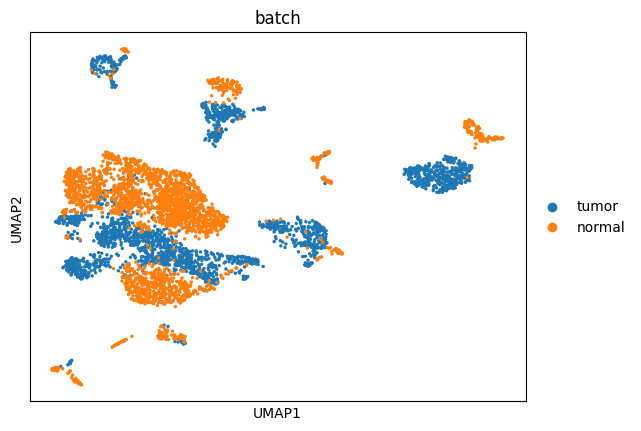

(2257, 155)


In [1]:
import numpy as np
import pandas as pd
import numpy as np
import scanpy as sc

# Read the two AnnData objects
adata_tumor = sc.read_h5ad('GSE184198\\GC\\adata_export.h5ad')
adata_normal = sc.read_h5ad('GSE184198\\NT\\adata_export.h5ad')

# Get common genes
common_genes = np.intersect1d(adata_tumor.var_names, adata_normal.var_names)
# Filter for common genes
adata_tumor = adata_tumor[:, common_genes]
adata_normal = adata_normal[:, common_genes]
# Merge the AnnData objects
adata_combined = adata_tumor.concatenate(adata_normal, batch_key='batch', batch_categories=['tumor', 'normal'])
# Perform normalization and scaling again
# sc.pp.scale(adata_combined, max_value=10)


file_path = r'scHDR\Example\Drug_Screening\Results\summary_scores.csv'
A1 = pd.read_csv(file_path)

A2 = pd.read_csv(r'GSE184198\GC\network\cell_features.csv')
A2.set_index(A2.columns[0], inplace=True)

adata = sc.AnnData(A2)
sc.pp.scale(adata, max_value=10)

sc.pp.pca(adata_combined, n_comps=50)
sc.pp.neighbors(adata_combined, random_state=42)
sc.tl.umap(adata_combined, random_state=42)

# Plot with customized settings
sc.pl.umap(adata_combined, color='batch')

import MACA as maca
import matplotlib.pyplot as plt


pg_df = pd.read_table("D:/Python/package/PanglaoDB_markers_27_Mar_2020.tsv")

# Remove mouse specific genes
pg_df = pg_df[pg_df['species'] != 'Mm']
cell_markers = {}  # cell_marker is a dictionary that contains names of cell types and their marker genes
marker_list = []
for i in list(set(pg_df["cell type"].values.tolist())):
    genes = pg_df[pg_df["cell type"] == i]['official gene symbol'].values.tolist()
    # Only use cell types with at least 5 genes and fewer than 300 genes
    if len(genes) >= 5 and len(genes) <= 300:
        cell_markers[i] = genes
        marker_list += genes
marker_list = list(set(marker_list))
marker_list = [i for i in marker_list if i in adata.var.index]
len(marker_list)

ad = adata.copy()
ad = ad[:, marker_list]

ad, annotation = maca.singleMACA(ad=ad, cell_markers=cell_markers, res=[0.8], n_neis=[7])  # GSE108383

ad.obs['Annotation'] = np.array(annotation)


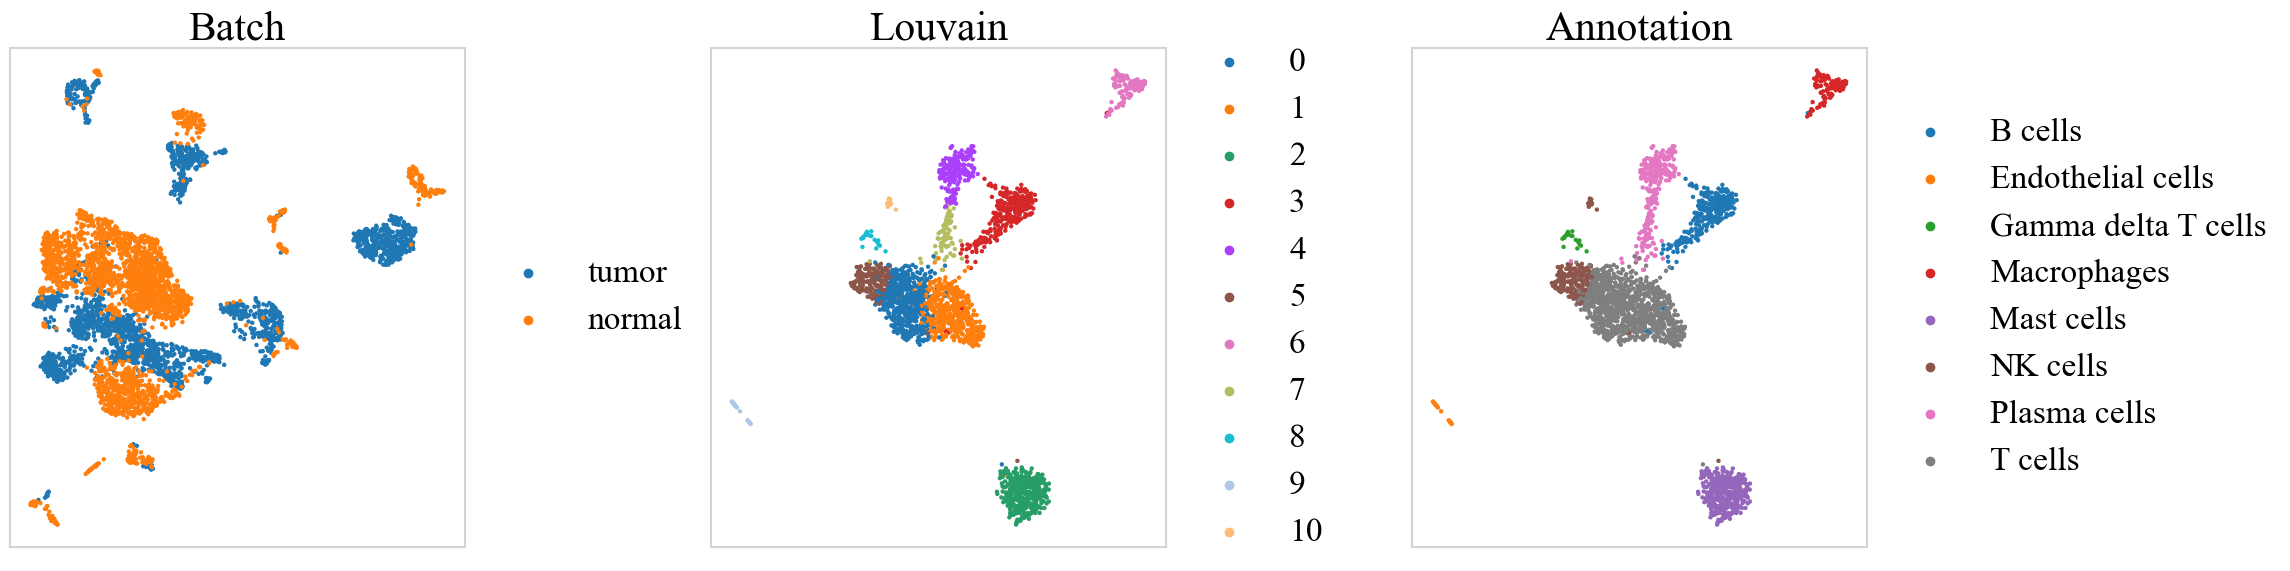

In [5]:
import matplotlib.pyplot as plt
import scanpy as sc

# Set global font to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(23, 6))  # Large enough to fit three plots

# Compute UMAP (make sure to compute it only once)
sc.tl.umap(ad, random_state=42)
sc.tl.umap(adata_combined, random_state=42)

# Plot UMAP into each subplot
sc.pl.umap(
    adata_combined, color='batch', title='Batch', ax=axs[0], show=False,
    frameon=True, size=40, legend_fontsize=24
)
sc.pl.umap(
    ad, color='louvain', title='Louvain', ax=axs[1], show=False,
    frameon=True, size=40, legend_fontsize=24
)
sc.pl.umap(
    ad, color='Annotation', title='Annotation', ax=axs[2], show=False,
    frameon=True, size=40, legend_fontsize=24
)

# Remove x and y axis labels, set uniform title font size
for ax in axs:
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.title.set_size(30)

# Set light grey border
for ax in axs:
    for _, spine in ax.spines.items():
        spine.set_color('#D3D3D3')
        spine.set_linewidth(1.5)

# Adjust layout and save the image with just the image name
plt.tight_layout()
plt.savefig('Fig_6a.svg', format='svg', dpi=900, bbox_inches='tight')
plt.show()


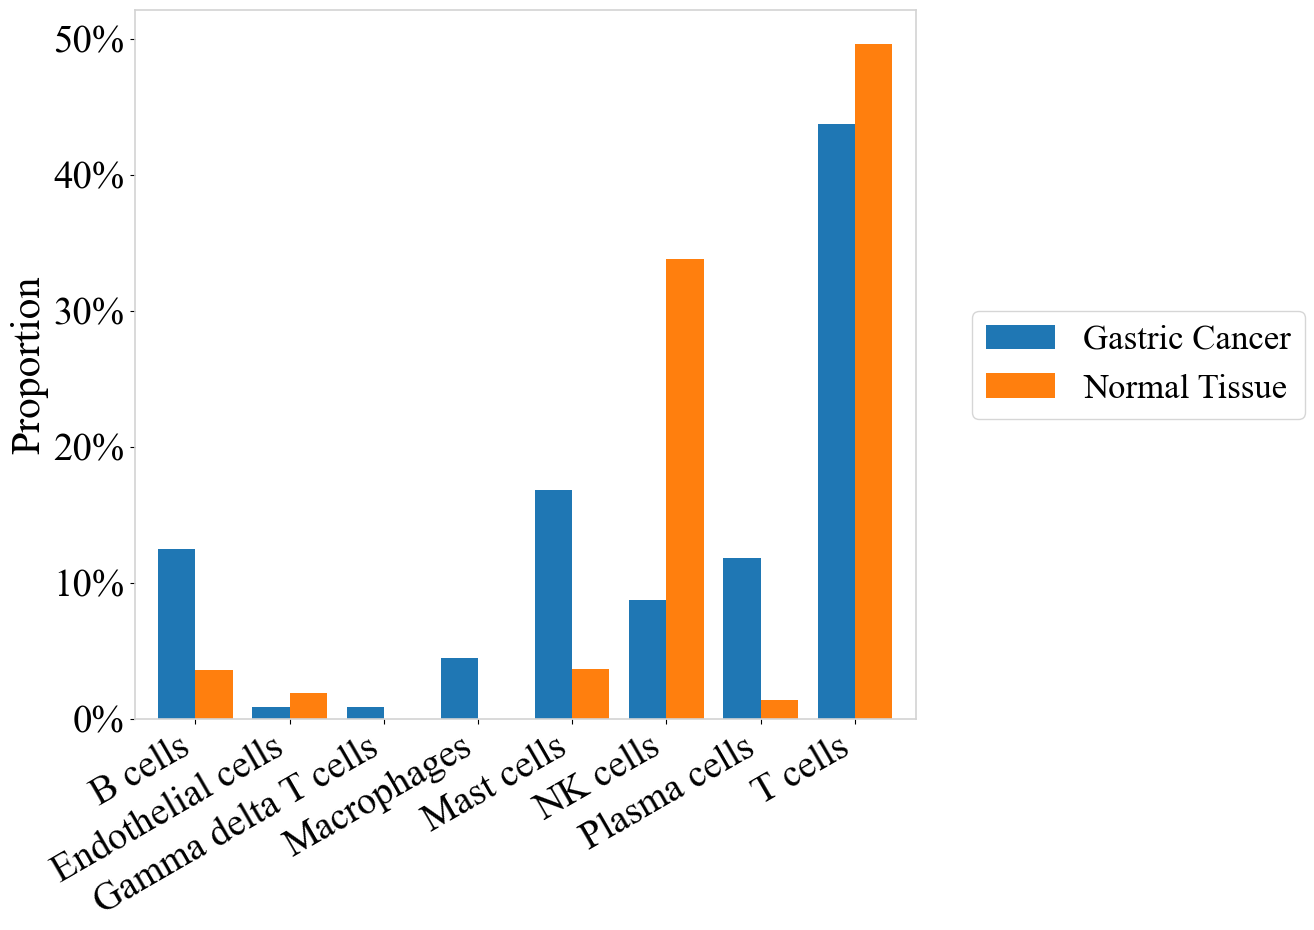

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Set global font to Times New Roman and decrease all font sizes by 10
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams.update({
    'font.size': 30,  # Decrease all font sizes by 10
    'figure.figsize': (14, 10),
    'axes.labelsize': 30,
    'axes.titlesize': 30,
    'xtick.labelsize': 28,
    'ytick.labelsize': 28,
    'legend.fontsize': 25,
    'axes.edgecolor': 'lightgrey',
    'axes.linewidth': 0.7,
    'axes.grid': False,  # Enable grid
#     'grid.color': 'lightgrey',
#     'grid.alpha': 0.5,
    'legend.loc': 'center left',
    'legend.frameon': True  # Legend has a border
})

#### Cell Proportion Plot ####
# Load the uploaded file
file_path = r"scHDR\Example\Drug_Screening\Results\proportion_table.csv"
data = pd.read_csv(file_path)

# Mapping the datasets to their respective labels
data['dataset'] = data['dataset'].replace({'proportion_gc': 'Gastric Cancer (GC)', 'proportion_nt': 'Normal Tissue (NT)'})

# Remove NaN values
cleaned_data = data.dropna(subset=['proportion'])

# plt.style.use('seaborn-whitegrid')

# Create a bar plot with a color map
bar_plot = cleaned_data.pivot(index='cell_type', columns='dataset', values='proportion').plot(kind='bar', width=0.79)

# Remove the title
plt.title('')

plt.xlabel('')
plt.ylabel('Proportion')

plt.xticks(rotation=30, ha='right')

# Customize the legend and place it at the right-center with a border
plt.legend(
    title=None,
    labels=['Gastric Cancer', 'Normal Tissue'],
    loc='center left',  # Place at the top-center
    bbox_to_anchor=(1.05, 0.5),  # Adjust above the plot to the right
    ncol=1,  # Set to one row
    frameon=True  # Add a border to the legend
)

# Apply custom border settings for the bar plot
for spine in bar_plot.spines.values():
    spine.set_edgecolor('lightgrey')
    spine.set_linewidth(1.2)

# Format y-axis as percentage
bar_plot.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x * 100)}%'))

# Save the plot with just the image name
plt.tight_layout()
plt.savefig('Fig_6b.svg', format='svg', dpi=900, bbox_inches='tight')
plt.show()


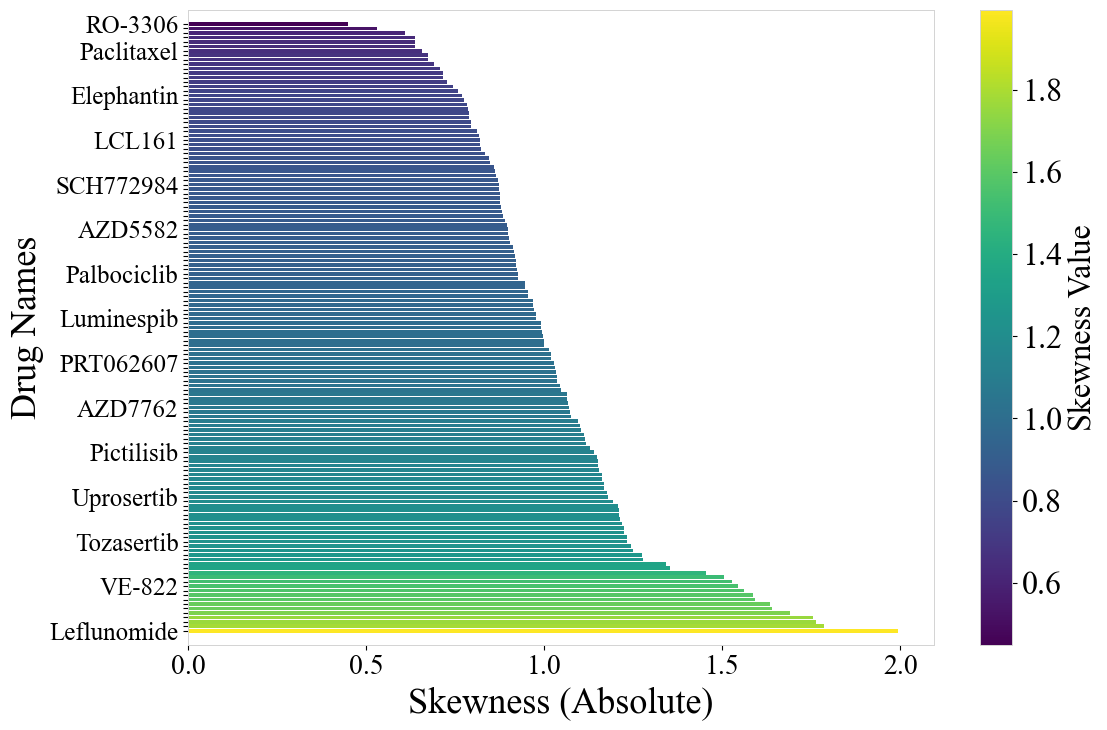

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew

# Set global font to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

#### Skewness Bar Plot ####
# Load the dataset
file_path = r'scHDR\Example\Drug_Screening\Results\summary_scores.csv'
data = pd.read_csv(file_path)

# Create a mapping of the dataset columns to drug names
column_to_drug_name = {}
for i in range(0, data.shape[1], 2):
    column = data.columns[i]
    drug_name = data.iloc[0, i]
    column_to_drug_name[column] = drug_name

# Calculate the skewness for each drug based on this mapping
drug_skewness_mapped = {}
for column, drug_name in column_to_drug_name.items():
    scores = data[column.replace('Drug', 'Average_Score')].dropna().values
    skewness_value = np.abs(skew(scores))
    drug_skewness_mapped[drug_name] = skewness_value

# Sort the drugs by skewness
sorted_drug_skewness_mapped = dict(sorted(drug_skewness_mapped.items(), key=lambda item: item[1], reverse=True))

# Plotting the skewness with correct drug names on the y-axis and selective labeling for clarity
fig, ax = plt.subplots(figsize=(12, 8))
cmap = plt.get_cmap("viridis")
norm = plt.Normalize(min(sorted_drug_skewness_mapped.values()), max(sorted_drug_skewness_mapped.values()))
colors = [cmap(norm(value)) for value in sorted_drug_skewness_mapped.values()]

bars = ax.barh(list(sorted_drug_skewness_mapped.keys()), list(sorted_drug_skewness_mapped.values()), color=colors)

# Add selective labels to y-axis to avoid clutter
max_skewness_drug = max(sorted_drug_skewness_mapped, key=sorted_drug_skewness_mapped.get)
min_skewness_drug = min(sorted_drug_skewness_mapped, key=sorted_drug_skewness_mapped.get)
y_labels = []
for i, drug in enumerate(sorted_drug_skewness_mapped.keys()):
    if i % 10 == 0 or drug == max_skewness_drug or drug == min_skewness_drug:  # Label every 10th drug and the max/min skewness drugs
        y_labels.append(drug)
    else:
        y_labels.append('')

ax.set_yticks(range(len(y_labels)))
ax.set_yticklabels(y_labels, fontsize=14)  # Font size -6

# Remove background
ax.set_facecolor('white')
fig.patch.set_facecolor('white')

# Add color bar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Skewness Value', fontsize=23)  # Font size -6
cbar.ax.tick_params(labelsize=23)  # Font size -6 for color bar ticks

# Customize the plot for Nature journal style
ax.set_xlabel('Skewness (Absolute)', fontsize=26)  # Font size -6
ax.set_ylabel('Drug Names', fontsize=26)  # Font size -6
ax.tick_params(axis='y', which='major', labelsize=18)  # Font size -6
ax.tick_params(axis='x', which='major', labelsize=20)  # Font size -6

# Add borders to the plot and adjust color
for spine in ax.spines.values():
    spine.set_edgecolor('#D3D3D3')  # Light grey color
    spine.set_visible(True)

# Adjust bar positions to be closer to the borders
ax.margins(y=0.02)  # Reduce margins
ax.grid(False)  # Solid lines

# Adjust the layout
plt.tight_layout()

# Save the plot with just the image name
plt.savefig('Fig_6c.svg', format='svg', dpi=900, bbox_inches='tight')

# Show the plot
plt.show()


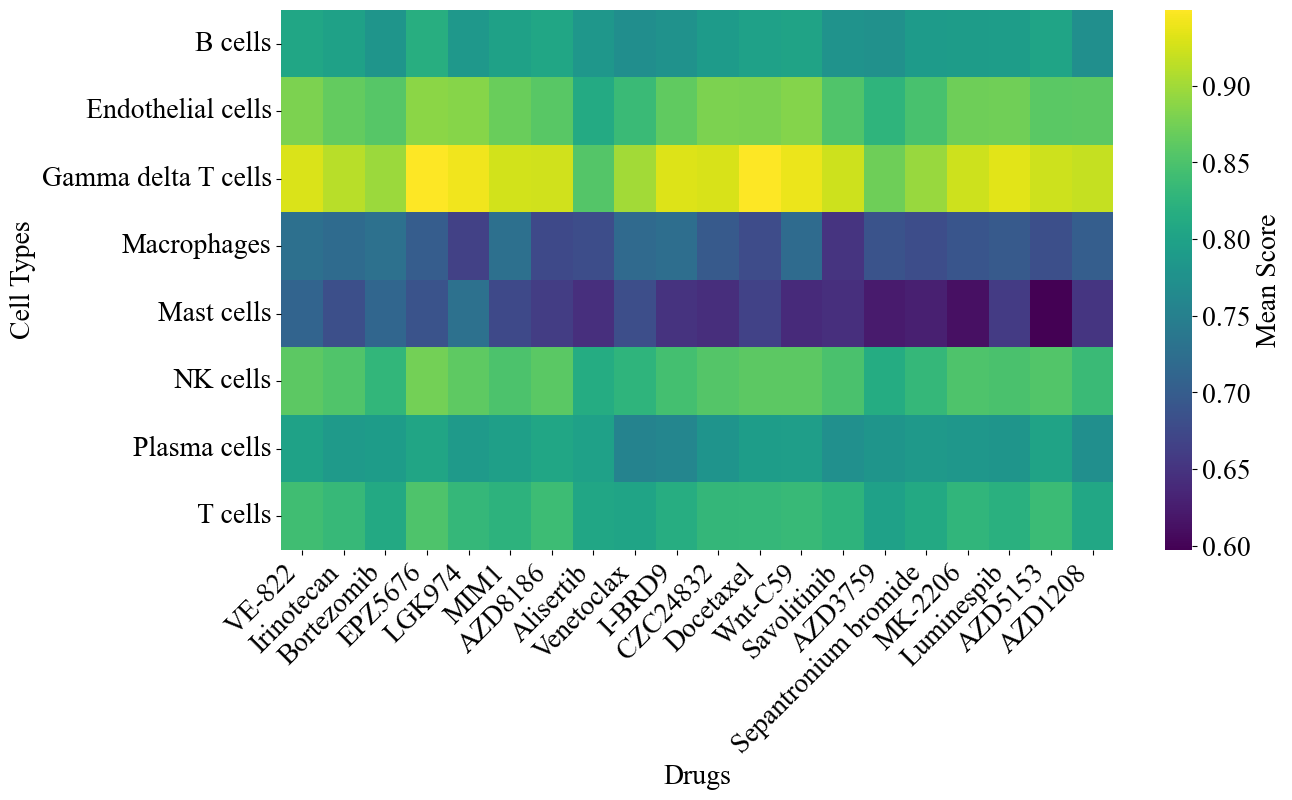

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"scHDR\Example\Drug_Screening\Results\Drug_Scores_Cell3.csv"
data = pd.read_csv(file_path)

# List of selected drugs
selected_drugs = [
    "VE-822", "Irinotecan", "Bortezomib", "EPZ5676", "LGK974", "MIM1", "AZD8186", 
    "Alisertib", "Venetoclax", "I-BRD9", "CZC24832", "Docetaxel", "Wnt-C59", 
    "Savolitinib", "AZD3759", "Sepantronium bromide", "MK-2206", "Luminespib", 
    "AZD5153", "AZD1208"
]

# Filter the dataframe for the selected drugs
filtered_data = data[["Annotation"] + selected_drugs]

# Group by cell type and calculate the mean score for each drug
grouped_data = filtered_data.groupby("Annotation").mean()

# Create the heatmap with gray text annotations
plt.figure(figsize=(16, 9))

# Create the heatmap
heatmap = sns.heatmap(grouped_data, annot=False, fmt=".2f", cmap="viridis", cbar_kws={'label': 'Mean Score'},
                      annot_kws={"color": "gray", "size": 12})

# Set labels for the axes
plt.xlabel('Drugs', fontsize=20)
plt.ylabel('Cell Types', fontsize=20)

# Adjust the tick labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=20, rotation=45, horizontalalignment='right')
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=20, rotation=0)

# Modify color bar font sizes
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)  # Set tick font size for color bar
cbar.set_label('Mean Score', fontsize=20)  # Set font size for color bar label

# Adjust layout for better appearance
plt.subplots_adjust(left=0.25, bottom=0.3, right=0.9, top=0.9)

# Save the plot with just the image name
plt.savefig('Fig_6d.svg', format='svg', dpi=900, bbox_inches='tight')

# Show the plot
plt.show()


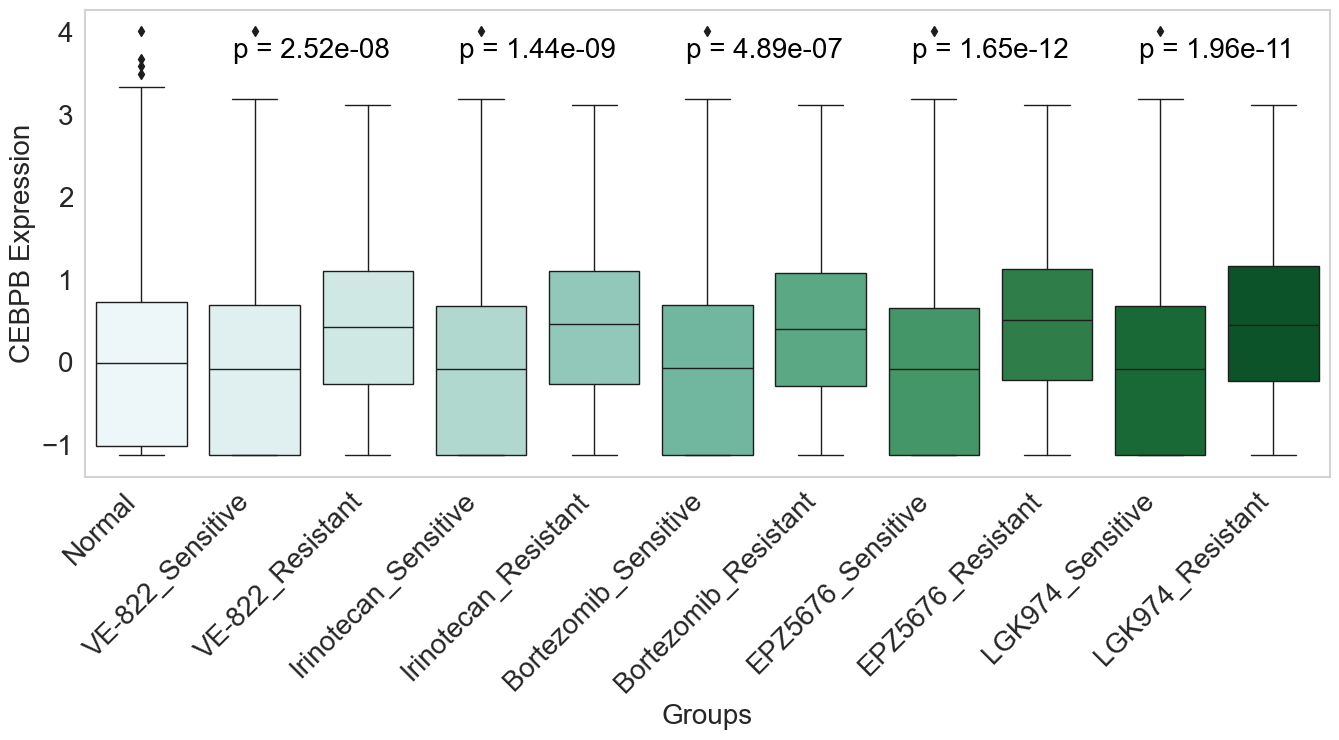

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Load the CSV files
gcnt_df = pd.read_csv(r"scHDR\Example\Drug_Screening\Results\GCNT-Cells.csv")
drug_scores_df = pd.read_csv(r"scHDR\Example\Drug_Screening\Results\Drug_Scores-Cells2.csv")

# Define the threshold for sensitivity
threshold = 0.6

# Extract relevant columns for "VE-822"
gcnt_df_filtered = gcnt_df.set_index('Cell')
drug_scores_filtered = drug_scores_df.set_index('Cell')

# List of drugs to analyze
drugs = ['VE-822', 'Irinotecan', 'Bortezomib', 'EPZ5676', 'LGK974']

# Function to perform analysis and identify sensitive and resistant cells
sensitive_cells_dict = {}
resistant_cells_dict = {}

for drug in drugs:
    # Merge the dataframes on the cell identifier for the current drug
    merged_df = gcnt_df_filtered.join(drug_scores_filtered[drug], how='inner')
    
    # Classify cells into sensitive and resistant groups for the current drug
    sensitive_cells_dict[drug] = merged_df[merged_df[drug] > threshold]['CEBPB']
    resistant_cells_dict[drug] = merged_df[merged_df[drug] <= threshold]['CEBPB']

# Prepare data for the boxplot
boxplot_data = []
labels = ['Normal']

# Normal cells
normal_expression = gcnt_df_filtered[gcnt_df_filtered['Annotation'] != 'tumor']['CEBPB']
boxplot_data.append(normal_expression.dropna())

# Drug sensitive and resistant groups
for drug in drugs:
    sensitive_group = sensitive_cells_dict[drug]
    resistant_group = resistant_cells_dict[drug]
    boxplot_data.append(sensitive_group.dropna())
    boxplot_data.append(resistant_group.dropna())
    labels.append(f'{drug}_Sensitive')
    labels.append(f'{drug}_Resistant')

plt.figure(figsize=(14, 8))

# Nature style settings with lighter lines for boxes
sns.set_context("paper", font_scale=1.5)
sns.set_style("whitegrid")
plt.grid(False)

# Create the boxplot with lighter box lines
boxplot = sns.boxplot(data=boxplot_data, palette="BuGn", linewidth=1)
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=45, ha='right', fontsize=20)  # Adjusted to 20
plt.yticks(fontsize=20)
plt.ylabel('CEBPB Expression', fontsize=20)
plt.xlabel('Groups', fontsize=20)
plt.tight_layout(pad=2)

# Add p-values directly above the groups with proper spacing inside the border
for i, drug in enumerate(drugs):
    sensitive_group = sensitive_cells_dict[drug]
    resistant_group = resistant_cells_dict[drug]
    t_stat, p_val = ttest_ind(sensitive_group.dropna(), resistant_group.dropna(), equal_var=False)
    x1, x2 = i * 2 + 1, i * 2 + 2
    y = max(boxplot_data[x1].max(), boxplot_data[x2].max()) - 0.4
    plt.text((x1 + x2) * .5, y, f"p = {p_val:.2e}", ha='center', va='bottom', color='k', fontsize=20)  # Adjusted to 20

# Draw border around the plot
for spine in plt.gca().spines.values():
    spine.set_edgecolor('#D3D3D3')
    spine.set_linewidth(1.5)

# Save the plot with just the image name
plt.savefig('Fig_6e.svg', format='svg', dpi=900, bbox_inches='tight')

# Show the plot
plt.show()


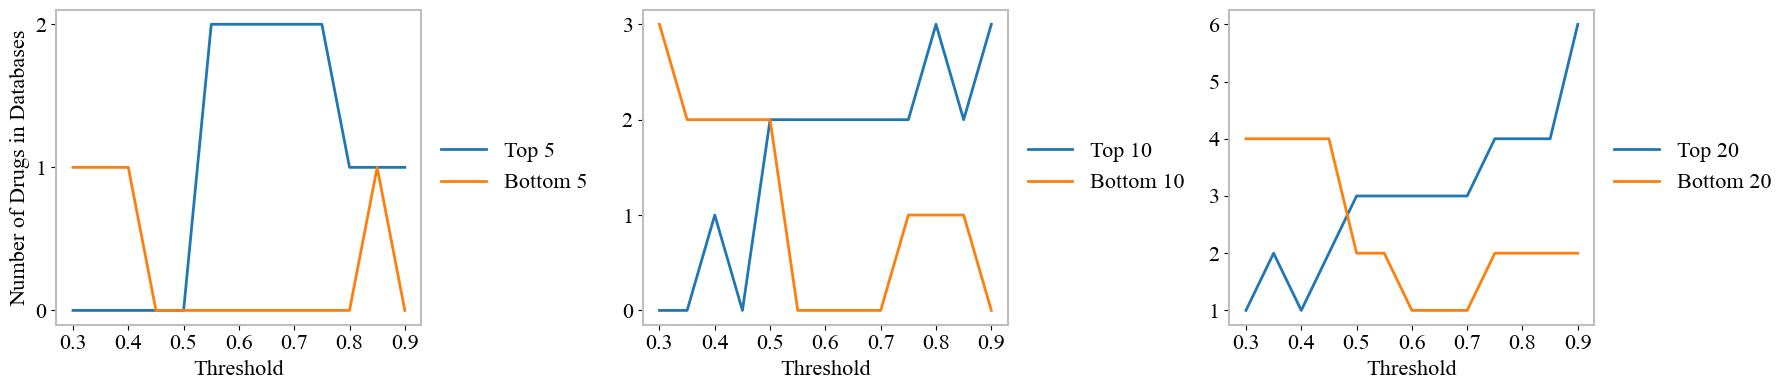

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Set global font to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

# Load the provided CSV file
file_path = r'scHDR\Example\Drug_Screening\Results\drug_effectiveness_analysis_threshold.csv'
data = pd.read_csv(file_path)

# Extract the data for each subplot
thresholds = data['Threshold']
top_5 = data['Top_5_Intersection']
bottom_5 = data['Bottom_5_Intersection']
top_10 = data['Top_10_Intersection']
bottom_10 = data['Bottom_10_Intersection']
top_20 = data['Top_20_Intersection']
bottom_20 = data['Bottom_20_Intersection']

# Create subplots in a single row with reduced height
fig, axs = plt.subplots(1, 3, figsize=(18, 4))

# Common properties for all subplots
border_color = '#BEBEBE'
border_width = 1.5

# Plot 1: Top 5 and Bottom 5 drugs
axs[0].plot(thresholds, top_5, label='Top 5', color='tab:blue', linewidth=2)
axs[0].plot(thresholds, bottom_5, label='Bottom 5', color='tab:orange', linewidth=2)
axs[0].set_xlabel('Threshold', fontsize=16)
axs[0].set_ylabel('Number of Drugs in Databases', fontsize=16)
axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=16)
axs[0].grid(False)
axs[0].yaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Plot 2: Top 10 and Bottom 10 drugs
axs[1].plot(thresholds, top_10, label='Top 10', color='tab:blue', linewidth=2)
axs[1].plot(thresholds, bottom_10, label='Bottom 10', color='tab:orange', linewidth=2)
axs[1].set_xlabel('Threshold', fontsize=16)
axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=16)
axs[1].grid(False)
axs[1].yaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Plot 3: Top 20 and Bottom 20 drugs
axs[2].plot(thresholds, top_20, label='Top 20', color='tab:blue', linewidth=2)
axs[2].plot(thresholds, bottom_20, label='Bottom 20', color='tab:orange', linewidth=2)
axs[2].set_xlabel('Threshold', fontsize=16)
axs[2].legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=16)
axs[2].grid(False)
axs[2].yaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Set consistent border color and width for all subplots
for ax in axs:
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_color(border_color)
        ax.spines[spine].set_linewidth(border_width)

# Adjust the tick labels font size
for ax in axs:
    ax.tick_params(axis='both', which='major', labelsize=16)  # Adjust the tick labels font size
    ax.xaxis.set_major_locator(plt.MultipleLocator(0.1))  # Set a tick every 0.1

# Adjust layout to avoid overlap and ensure proper spacing
plt.tight_layout()

# Save the plot with just the image name
plt.savefig('Fig_6f.svg', format='svg', dpi=900, bbox_inches='tight')

# Display the plot
plt.show()


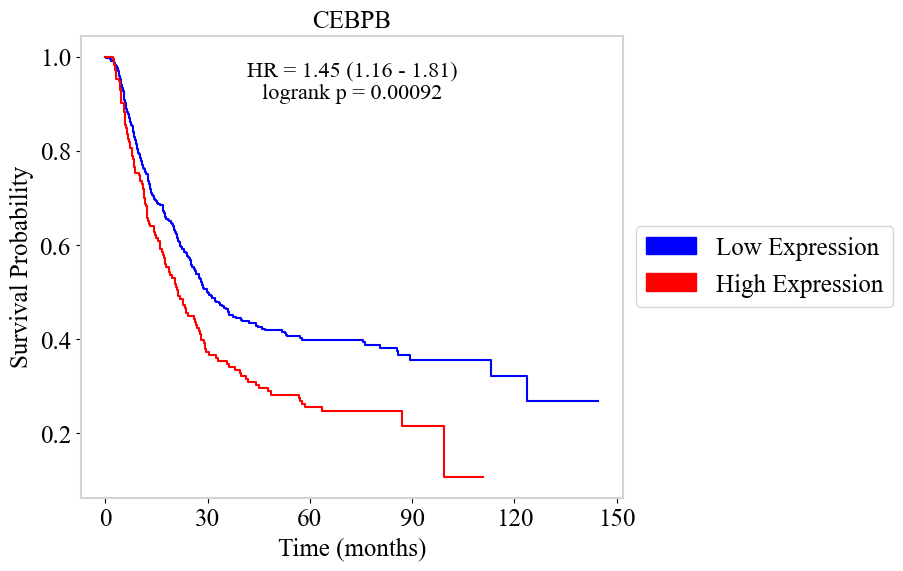

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
import numpy as np
from lifelines.statistics import multivariate_logrank_test
import matplotlib.patches as mpatches

# Set global font to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

# Load the data
file_path = r'scHDR\result_new2\Drug_Screening_Survival_Analysis.xlsx'
data = pd.read_excel(file_path)

# Prepare the data
T = data['Time (months)']  # Survival time in months
E = data['Event']  # Event (1 = event occurred, 0 = censored)
groups = data['Expression (1=high)']  # Expression levels (1 = high, 0 = low)

# Initialize the KaplanMeierFitter
kmf = KaplanMeierFitter()

# Plotting the KM curve
fig, ax = plt.subplots(figsize=(7, 6))

# Plot for low expression group
kmf.fit(T[groups == 0], E[groups == 0], label='Low Expression')
kmf.plot_survival_function(ax=ax, ci_show=False, color='blue')

# Plot for high expression group
kmf.fit(T[groups == 1], E[groups == 1], label='High Expression')
kmf.plot_survival_function(ax=ax, ci_show=False, color='red')

# Perform log-rank test
results = multivariate_logrank_test(T, groups, E)
p_value = results.p_value

# Hazard Ratio (HR)
hr = 1.45  # This is a placeholder value
hr_ci_low = 1.16  # This is a placeholder value
hr_ci_high = 1.81  # This is a placeholder value

# Customizing the plot for Nature style
plt.title('CEBPB', fontsize=18)
plt.xlabel('Time (months)', fontsize=18)
plt.ylabel('Survival Probability', fontsize=18)

# Adding HR and p-value at the top
plt.text(0.5, 0.9, f'HR = {hr:.2f} ({hr_ci_low:.2f} - {hr_ci_high:.2f})\nlogrank p = 0.00092', ha='center', va='center', transform=ax.transAxes, fontsize=16, bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))

# Adding the legend outside the plot
blue_patch = mpatches.Patch(color='blue', label='Low Expression')
red_patch = mpatches.Patch(color='red', label='High Expression')
plt.legend(handles=[blue_patch, red_patch], loc='center left', bbox_to_anchor=(1, 0.5), fontsize=18)

ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)

# Set x-axis ticks to have intervals of 30
x_ticks = np.arange(0, T.max() + 30, 30)
ax.set_xticks(x_ticks)

# Adjust border line width to be lighter (set to a light grey color)
light_border_color = '#D3D3D3'  # Lighter grey color
ax.spines['top'].set_color(light_border_color)
ax.spines['right'].set_color(light_border_color)
ax.spines['bottom'].set_color(light_border_color)
ax.spines['left'].set_color(light_border_color)
ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)

# Remove grid lines
ax.grid(False)

# Setting Nature style
# plt.style.use('seaborn-white')

# Save the plot with just the image name
plt.savefig('Fig_6g.svg', format='svg', dpi=900, bbox_inches='tight')

plt.show()
